## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [303]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [628]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [629]:
if data.isnull().sum().sum() > 0:
    print('В таблице есть пропущенные значения')
else:
    print('В таблице нет пропущенных значений')

kolich = ['amount', 'duration', 'age'] #здесь количественные признаки, далее по порядку идут списки бинарных, порядковых и категориальных
binary = ['telephone', 'foreign_worker', 'credit_risk']
poryadk = ['status', 'employment_duration', 'savings', 'installment_rate', 'number_credits', 'people_liable', 'present_residence']
categ = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']



В таблице нет пропущенных значений


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [630]:
print(data.groupby('purpose')["amount"].mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [631]:
#то, какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)
print((data.loc[(data["age"] < 30) & (data['housing'] == 'rent')]['age'].count())/(data.loc[(data["age"] < 30)]['age'].count()))
#то, какой процент клиентов старше 40 лет снимает жилье
print((data.loc[(data["age"] > 40) & (data['housing'] == 'rent')]['age'].count())/(data.loc[(data["age"] > 40)]['age'].count()))


0.6666666666666666
0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [632]:
print(data.loc[((data["number_credits"] == '4-5') | (data["number_credits"] == '>= 6')) & (data['foreign_worker'] == 'yes')]['foreign_worker'].count())

1


### Задание 6 (1 балл)

In [309]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

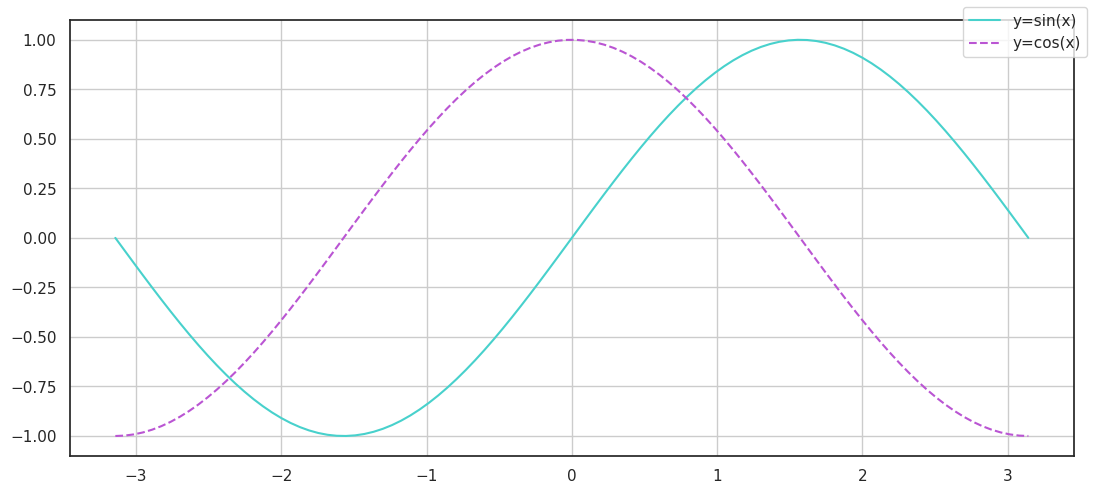

In [633]:
#задаю функции
t = np.linspace(-np.pi, np.pi, 100)
sinus = np.sin(t)
cosinus = np.cos(t)
#сами графики
fig, ax = plt.subplots()
line1 = ax.plot(t, sinus, color='mediumturquoise', label='y=sin(x)')
line2 = ax.plot(t, cosinus, color='mediumorchid', linestyle='dashed', label='y=cos(x)')
ax.grid()
fig.legend()
plt.tight_layout()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

/tmp/ipykernel_429/3543769649.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sht1 = plt.subplot(121)


Text(0.5, 1.0, 'Bad Risk')

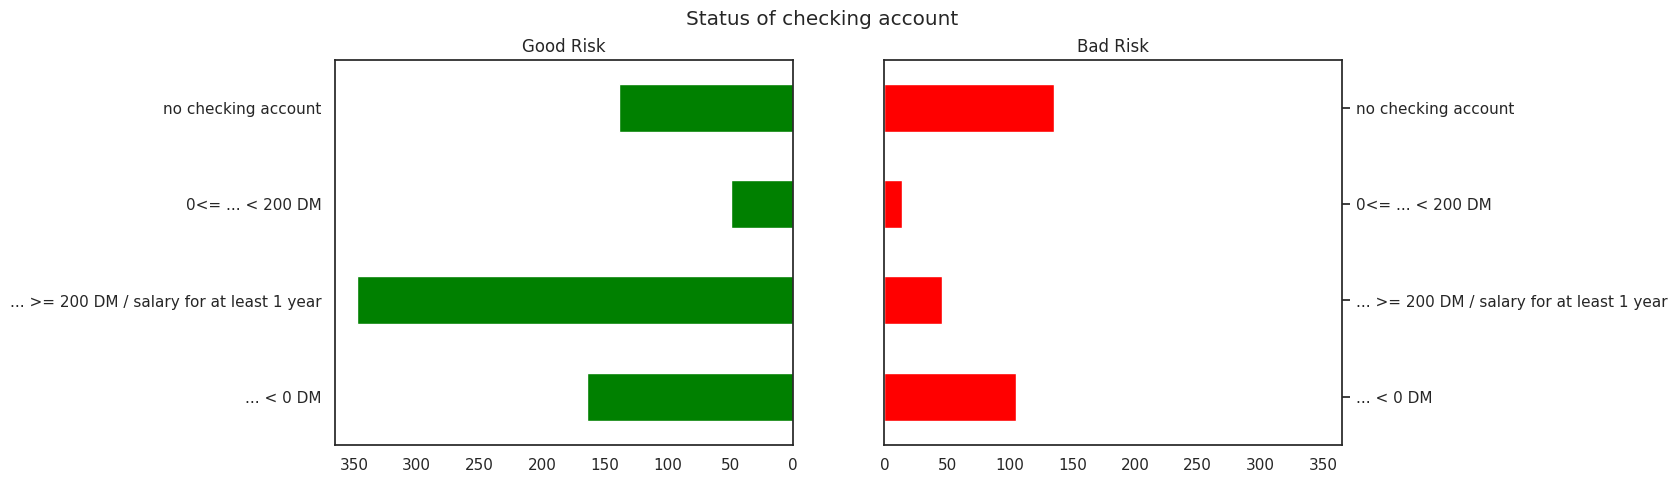

In [634]:
#делаю два графика, задаю размер
fig, axs = plt.subplots(2, figsize=(13, 5))
#название всей картинки
plt.suptitle('Status of checking account')
#первый график
sht1 = plt.subplot(121)
plt.gca().invert_xaxis()
data1 = data[data['credit_risk'] == 'good']['status'].value_counts().sort_index()
data1.plot.barh(color='green')
sht1.set_title('Good Risk')
#второй график
sht2 = plt.subplot(122)
plt.xlim(sht1.get_xlim())
plt.gca().invert_xaxis()
data2 = data[data['credit_risk'] == 'bad']['status'].value_counts().sort_index()
data2.plot.barh(color='red')
sht2.yaxis.tick_right()
sht2.set_title('Bad Risk')


### Задание 8  (0.5 балла)

In [312]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

'Ответ на вопрос: \n   вот этот второй способ менее трудоемкий, но мне кажется, что с точки зрения восприятия результата, \n   график из задания 7 лучше'

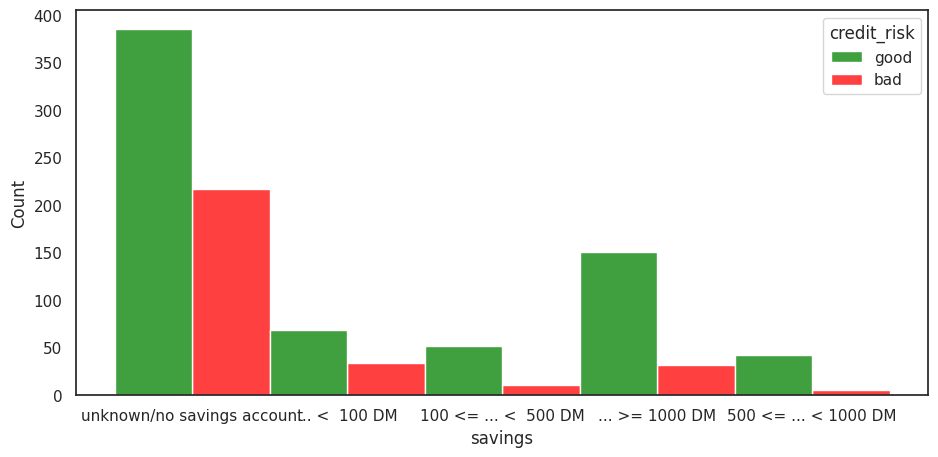

In [635]:
#задаю размер и стиль графика
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white")
#рисую сам график
sns.histplot(x='savings', hue='credit_risk', multiple='dodge', data=data, palette={'bad': 'red', 'good': 'green'})
'''Ответ на вопрос: 
   вот этот второй способ менее трудоемкий, но мне кажется, что с точки зрения восприятия результата, 
   график из задания 7 лучше'''


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

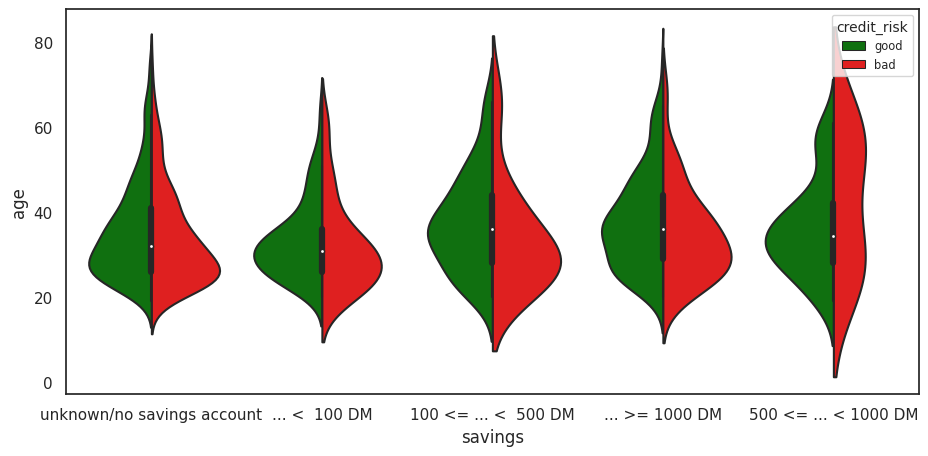

In [636]:
#рисую график
sns.violinplot(x="savings", y='age', hue="credit_risk", split=True, data=data, palette={'bad': 'red', 'good': 'green'})
#дополняю легенду и оформляю ее
plt.legend(fontsize='x-small', title='credit_risk', title_fontsize='small', loc='upper right')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

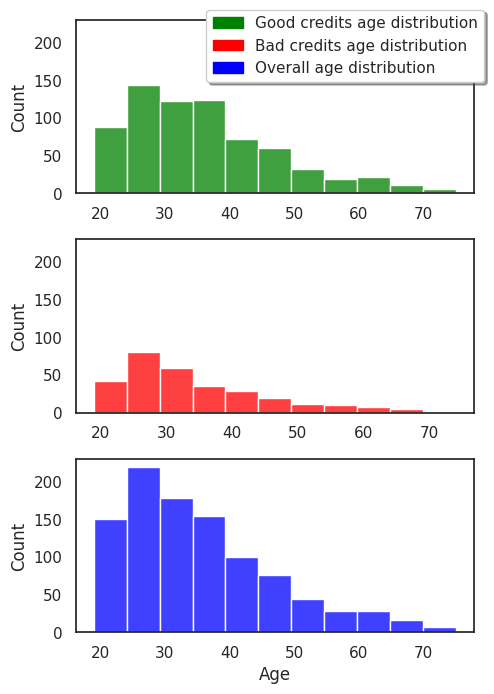

In [637]:
from matplotlib import patches as mpatches
#задаю стиль графика
sns.set_style('white')
#делаю группу графиков (подграфиков)
fig, axs = plt.subplots(nrows=3, figsize=(5, 7))
#тут первый график
sht1 = sns.histplot(data[data['credit_risk'] == 'good']['age'], kde = False, color ='green', bins = 11, ax=axs[0])
sht1.set(xlabel = '', ylabel='Count')
#тут второй
sht2 = sns.histplot(data[data['credit_risk'] == 'bad']['age'], kde = False, color ='red', bins = 11, ax=axs[1])
sht2.set(xlabel = '', ylabel='Count')
#тут третий
sht3 = sns.histplot(data['age'], kde = False, color ='blue', bins = 11, ax=axs[2])
sht3.set(xlabel = 'Age', ylabel='Count')
#тут задаю одинаковую длину оси у для всех трех графиков по последнему
sht2.set_ylim((sht3.get_ylim()))
sht1.set_ylim((sht3.get_ylim()))
#создаю легенду к нарисованным графикам
red = mpatches.Patch(color='red')
green = mpatches.Patch(color='green')
blue = mpatches.Patch(color='blue')
fig.legend(labels=['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'], handles=[green, red, blue], bbox_to_anchor=(1, 1), fancybox=True, shadow=True, loc='upper right')
fig.tight_layout()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

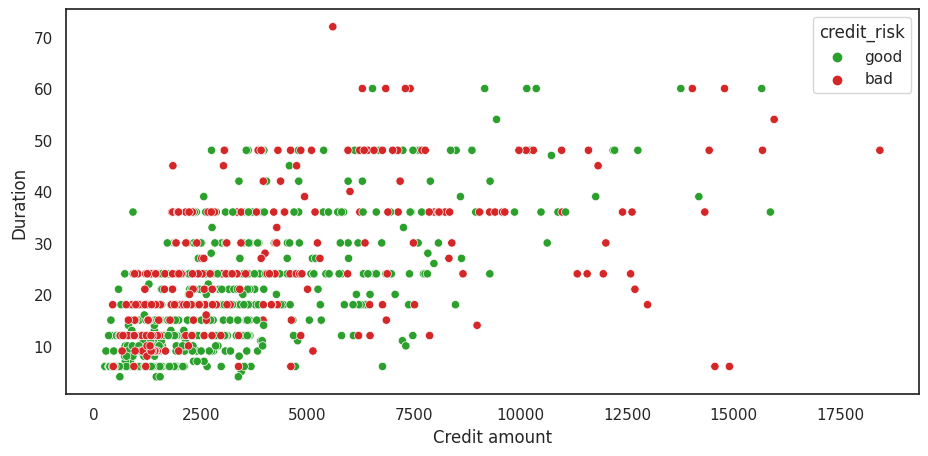

In [638]:
#задаю размер графика и стиль
sns.set(rc={'figure.figsize':(11, 5)})
sns.set_style("white")
#определяю цвета точек на графике
palette = [sns.color_palette("tab10")[2], sns.color_palette("tab10")[3]]
#рисую сам график
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette=palette)
#подписываю оси
plt.xlabel("Credit amount")
plt.ylabel("Duration")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'Age')

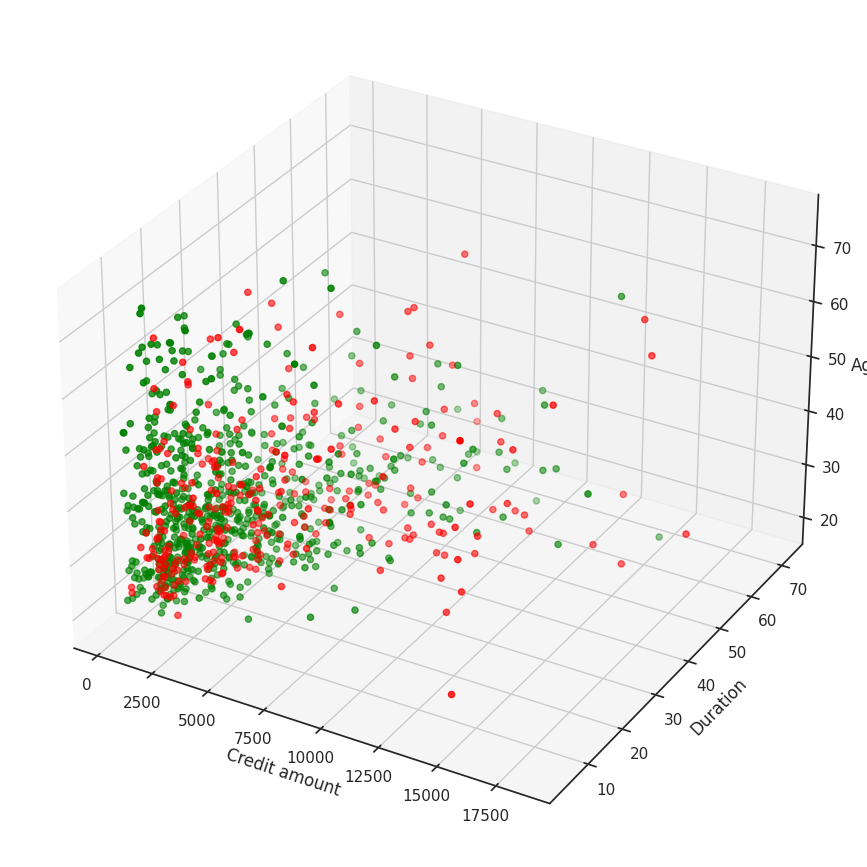

In [639]:
#задаю нужные данные
data1 = data[data["credit_risk"] == 'good']
data2 = data[data["credit_risk"] == 'bad']
#передаю нужные данные в параметры, чтобы потом по ним рисовать график
xs1 = data1['amount']
ys1 = data1['duration']
zs1 = data1['age']
xs2 = data2['amount']
ys2 = data2['duration']
zs2 = data2['age']
#рисую сам график
fig = plt.figure(figsize=(11, 11))
#делаю его трехмерным
ax = plt.axes(projection='3d')
ax.scatter(xs1, ys1, zs1, c='green')
ax.scatter(xs2, ys2, zs2, c='red')
#подписываю оси
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [640]:
#копирую сюда те признаки,которые не являются количественными
binary = ['telephone', 'foreign_worker', 'credit_risk']
poryadk = ['status', 'employment_duration', 'savings', 'installment_rate', 'number_credits', 'people_liable', 'present_residence']
categ = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']
#задаю бинарные признаки в виде числовых значений
for i in binary:
    t = data[i].unique()
    first = t[0]
    second = t[1]
    data[i] = data[i].map({first: 1, second: 0})
#делаю то же самое для порядковых признаков
for j in poryadk:
    k = data[j].unique()
    N = len(data[j].unique())
    dictionary = {}
    for g in range(N):
        dictionary[k[g]] = g
    data[j] = data[j].map(dictionary)
#убираю категориальные признаки
for f in categ:
    data.pop(f)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [651]:
def predict(Xtest: np.array):
    #создаю словарь для предсказываемых значений
    shtuka = []
    #здесь сама формула, объяснение ниже
    for i in range(len(Xtest[:, 0])):
        x = 13*Xtest[i, 0] - 1.6*Xtest[i, 1] - 1.6*Xtest[i, 2] - 0.2*Xtest[i, 3] - 0.3*Xtest[i, 4] - Xtest[i, 5] - 1.7*Xtest[i, 6] - Xtest[i, 7] - 1.8*Xtest[i, 8] - 1.9*Xtest[i, 9] - 1.6*Xtest[i, 10] - Xtest[i, 11]
        #если отрицательное значение, то при прибавлении 1 получаем 0, если положительное, то 2, делим на 2, получаем 0 и 1 соответственно
        shtuka.append(int((np.sign(x)+1)/2))
    return np.array(shtuka)       

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X = data.drop('credit_risk', 1)
y = data['credit_risk'].values
#масштабирую все значения
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X)
X = pd.DataFrame(data=X_real_norm_np).values
#делю выборку на тренировочные и тестовые данные  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
#смотрю на точность 
accuracy_score(y_test, predict(X_test))

/tmp/ipykernel_429/3926248809.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1)


0.648

Пояснение к составленной формуле: если посмотреть на данные (я это делала в Exсel), можно увидеть сильную корреляцию между признаком 'status' (с помощью его одного можно распределить данные так, что получится точность примерно 0,652), однако, если смотреть на остальные столбцы в уже отмасштабированной таблице, можно заметить еще корреляции, не настолько сильные. Формула построена по следующей логике: первый признак (нулевой в таблице) имеет самую сильную корреляцию, если он имеет значение 0,33 и больше, то мы в среднем чаще получаем значение 1 (равное 'good'), поэтому умножим его сначала на примерно 12 (столько всего признаков в таблице), далее из полученного значения вычитаем все остальные признаки, добавляя к ним веса (1.5, если корреляцию можно найти по таблице и зависимость скорее обратная величине признака (мы склонны получить 0, если значение признака большое), и 0.5, если корреляцию можно найти по таблице и зависимость скорее прямая величине признака), получаем точность около 0,64, что достаточно высоко, далее вручную немного корректируем веса признаков, чтобы повысить точность, смотрим на результат.